# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
wine = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz", sep="\t")
wine.head() #this shows just the first few rows of a dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# YOUR CODE HERE

#fixed acidity --> This helps keep wine fresh and balances the sweetness as well as the whole "taste profile." These are the non-volatile acids in the wine like lactic and malic acids. 
# volatile acidity --> This is the measure of the wine's gaseous acids particularly acetic acid which contributes to wine's vinegary taste.
# citric acid --> This adds a fresh flavor to wine, and can be used to adjust the acidity and flavor to the wine after fermentation.
# residual sugar --> This is the amount of sugar that is left over in wine from grapes after the fermentation process. 
# chlorides --> These are salts added to wine to enhance wine's texture (make it smoother tasting). 
# free sulfur dioxide --> This type of sulfur dioxide helps to prevent wine from oxidizing which can give a bad taste and scent to the wine and keeps it from going bad and overgrowing microorganisms. (Too much can prevent the wine from "breathing" like when you use a decanter).
# total sulfur dioxide --> This is the total amount of sulfur dioxide in wine which includes the free sulfur dioxides above as well as the bound sulfur dioxides. This also includes the SO2 that is bound to other chemicals in the wine. (Generally, the higher TS02 the more stable FSO2 is. Which is good for the wine).
# density --> This is the mass vs volumn of wine at 20 degrees celsius. This can represent the alcohol percentage as well as the sugar/sweetness content. (There is also vine density which means something different). 
# pH --> Wine always has a pH below 7 but this is a measure of its acidity which correlates to its taste, stability and color (whites and reds have different ranges of pH).
# sulphates --> Are not typically used in wines but contribute the the smell of the wine. These are salts of sulfuric acid.
# alcohol --> This is the ethanol in wine that is present after the fermentation process. This can be measured by volume, and the amount of alcohol present in a wine can result from the type of grapes and the climate they came from.
# target --> The target in this dataframe is seeking a rating for wine quality based on the features above. 

YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

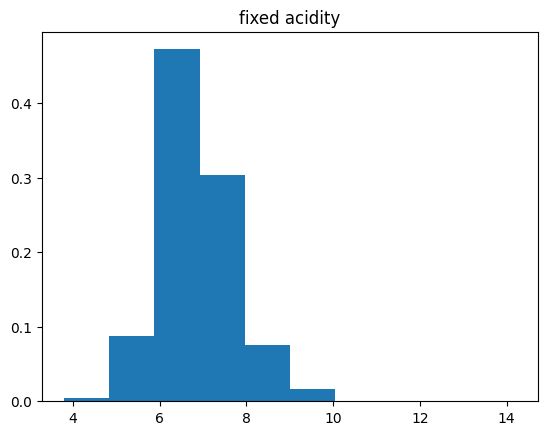

In [5]:
# YOUR CODE HERE
# fixed acidity distribution: Normal 
plt.hist(wine['fixed acidity'], density=True)
plt.title("fixed acidity");


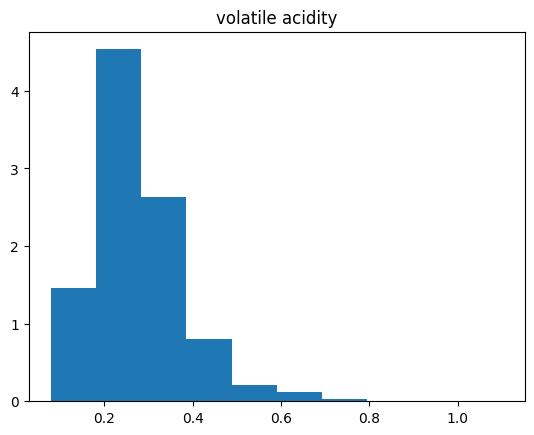

In [6]:
#volatile acid distribution: Right-skew 
plt.hist(wine['volatile acidity'], density=True)
plt.title('volatile acidity');

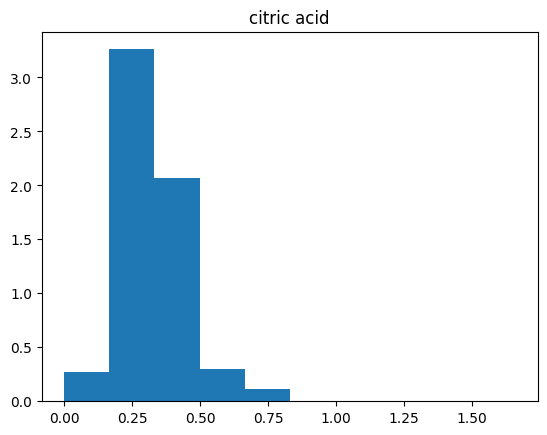

In [7]:
# citric acid distribtion: Normal 
plt.hist(wine['citric acid'], density=True)
plt.title('citric acid');

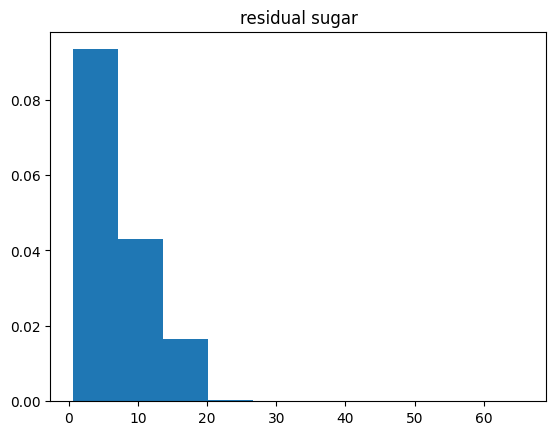

In [8]:
#residual sugar distribution: Right-skewed
plt.hist(wine['residual sugar'], density=True)
plt.title('residual sugar');

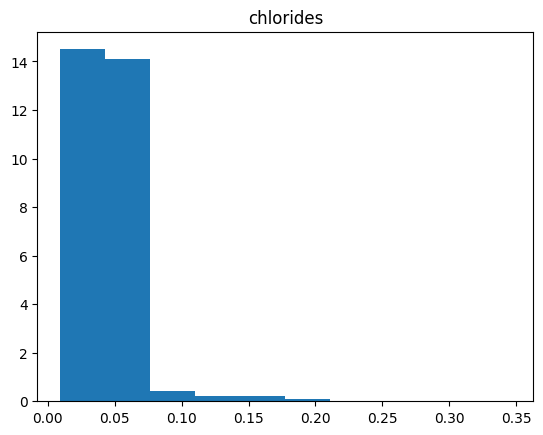

In [9]:
# chlorides distribution: Right-skew 
plt.hist(wine['chlorides'], density=True)
plt.title('chlorides');

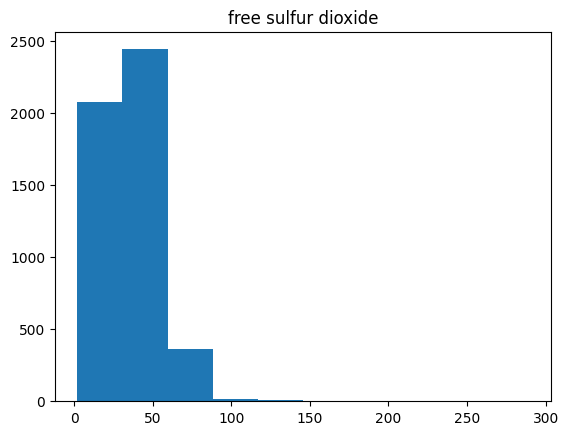

In [10]:
# free sulfur dioxide distribution: Random
plt.hist(wine['free sulfur dioxide'])
plt.title('free sulfur dioxide');

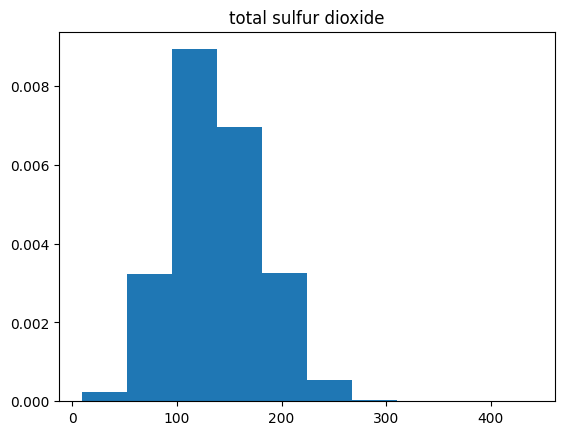

In [11]:
# total sulfur dioxide distribution: Normal 
plt.hist(wine['total sulfur dioxide'], density=True)
plt.title('total sulfur dioxide');

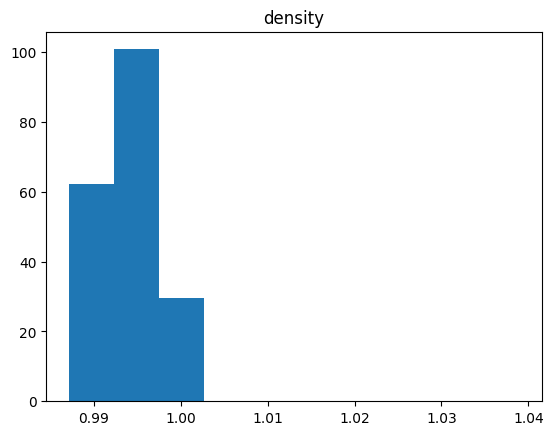

In [12]:
# density distribution: Random
plt.hist(wine['density'], density=True)
plt.title('density');

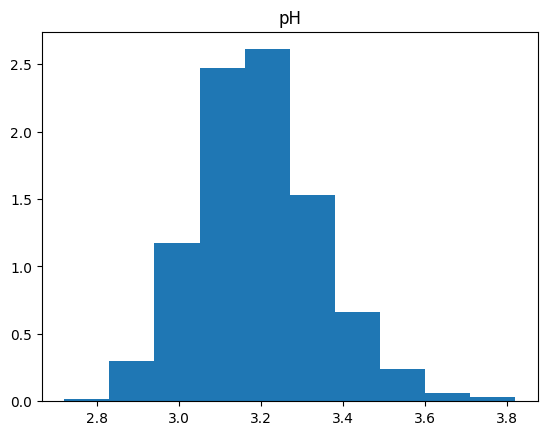

In [13]:
# pH distribution: Normal 
plt.hist(wine['pH'], density=True)
plt.title('pH');

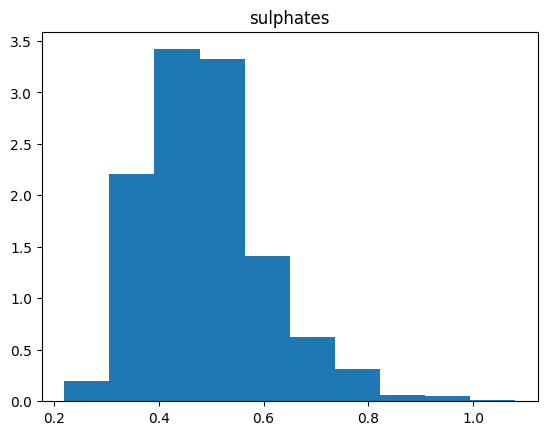

In [14]:
# sulphates distribution: Normal 
plt.hist(wine['sulphates'], density=True)
plt.title('sulphates');

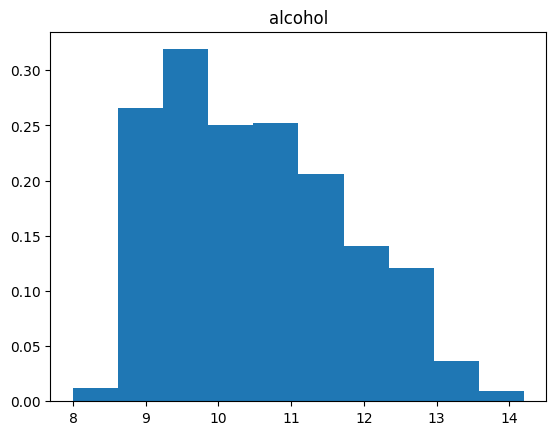

In [15]:
# alcohol distribution: Right-skew
plt.hist(wine['alcohol'], density=True)
plt.title('alcohol');

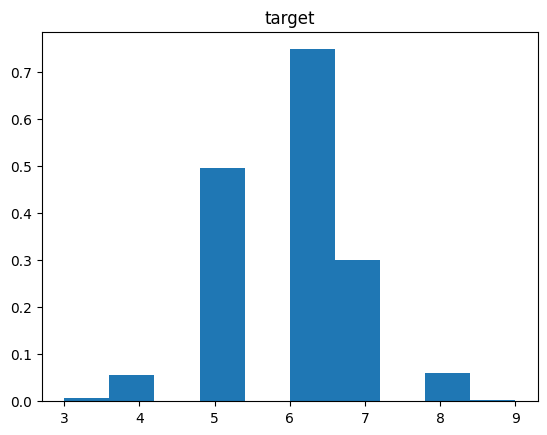

In [16]:
# target distribution: Random 
plt.hist(wine['target'], density=True)
plt.title('target');

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

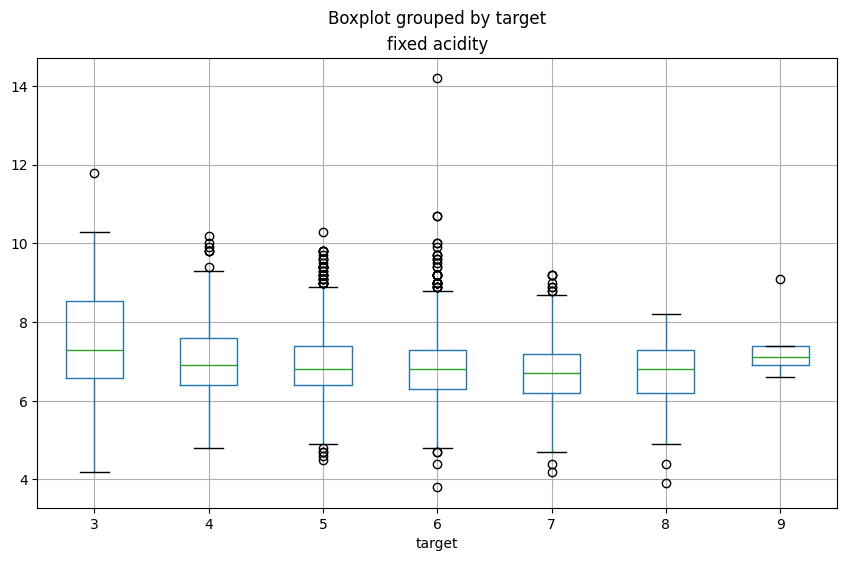

-0.11366283071301776


In [ ]:
# fixed acidity INDEPENDENT
wine.boxplot(column='fixed acidity', by='target', figsize=(10,6))
plt.show()
# wine.plot.scatter(x='fixed acidity', y='target');
corr= wine['fixed acidity'].corr(wine['target'])
print(corr)

-0.19472296892113414


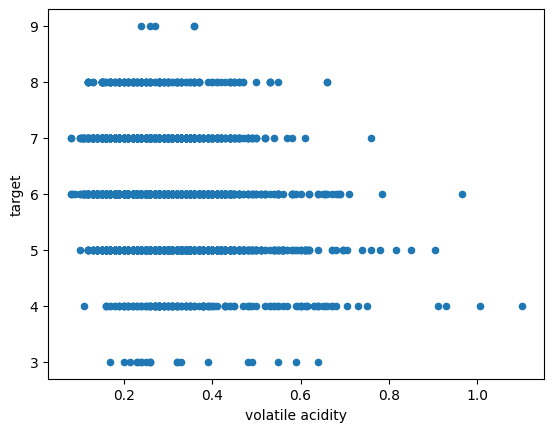

In [50]:
# volatile acidity
wine.plot.scatter(x='volatile acidity', y='target');
corr= wine['volatile acidity'].corr(wine['target'])
print(corr)

-0.009209090883975403


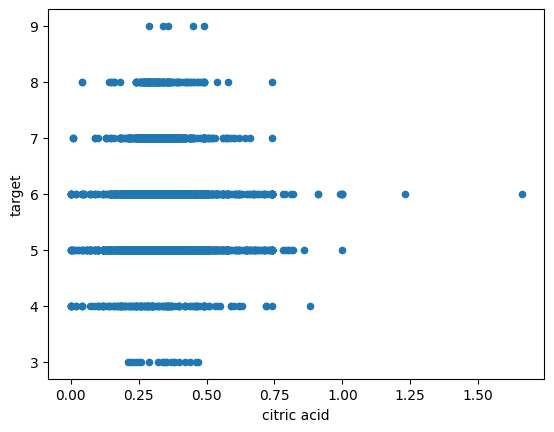

In [51]:
# citric acid 
wine.plot.scatter(x='citric acid', y='target');
corr= wine['citric acid'].corr(wine['target'])
print(corr)

-0.09757682889469309


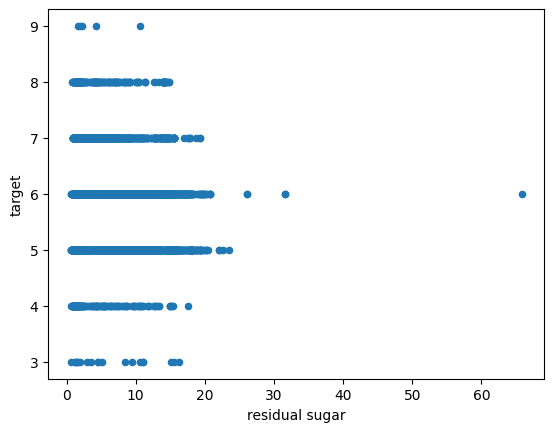

In [52]:
# residual sugar 
wine.plot.scatter(x='residual sugar', y='target');
corr= wine['residual sugar'].corr(wine['target'])
print(corr)

-0.20993441094676024


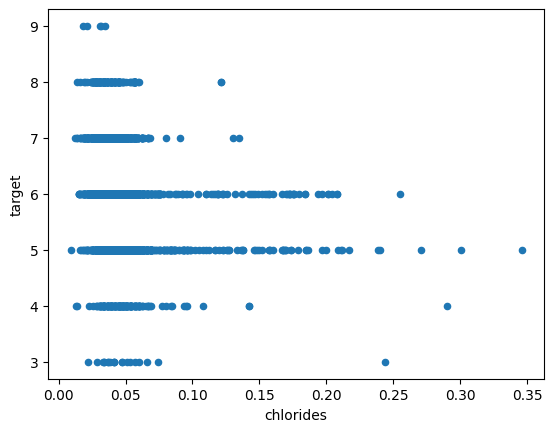

In [53]:
# chlorides 
wine.plot.scatter(x='chlorides', y='target');
corr= wine['chlorides'].corr(wine['target'])
print(corr)

0.008158067123436048


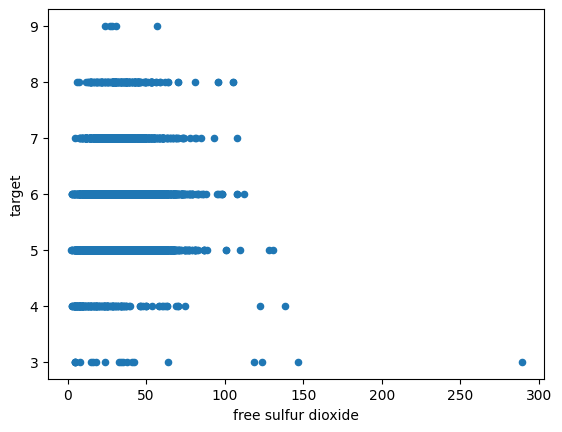

In [54]:
# free sulfur dioxide 
wine.plot.scatter(x='free sulfur dioxide', y='target');
corr= wine['free sulfur dioxide'].corr(wine['target'])
print(corr)

-0.17473721759706262


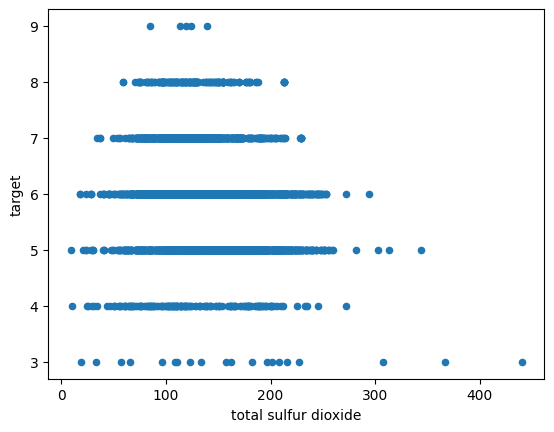

In [56]:
# total sulfur dioxide 
wine.plot.scatter(x='total sulfur dioxide', y='target');
corr= wine['total sulfur dioxide'].corr(wine['target'])
print(corr)

-0.3071233127347302


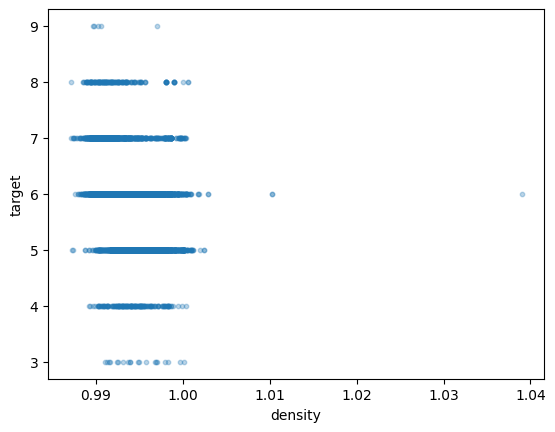

In [60]:
# density
wine.plot.scatter(x='density', y='target', alpha=0.3, s=10);
corr= wine['density'].corr(wine['target'])
print(corr)

0.09942724573666417


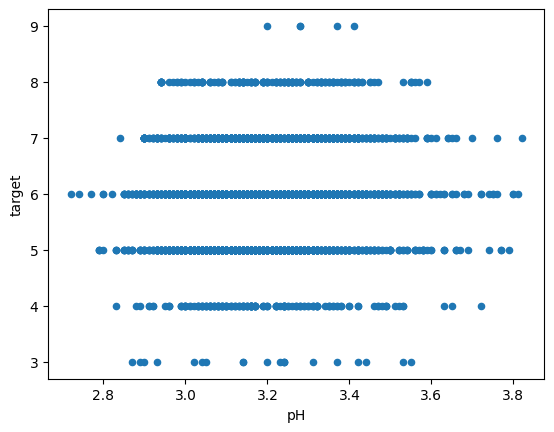

In [61]:
# pH 
wine.plot.scatter(x='pH', y='target');
corr= wine['pH'].corr(wine['target'])
print(corr)

0.053677877132792005


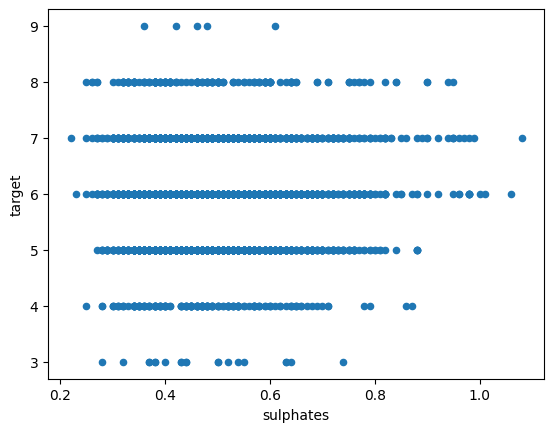

In [62]:
#suplhates
wine.plot.scatter(x='sulphates', y='target');
corr= wine['sulphates'].corr(wine['target'])
print(corr)


0.4355747154613725


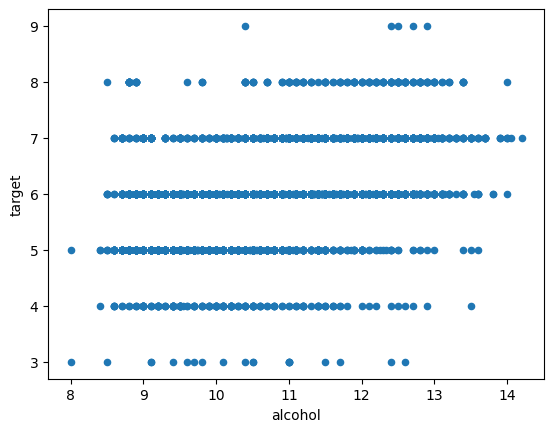

In [63]:
#alcohol 
wine.plot.scatter(x='alcohol', y='target');
corr= wine['alcohol'].corr(wine['target'])
print(corr)

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE None 